In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
station_files = {
    'mtalbert': '../Data/soil data/AcrossAucklandRainfallStation/MtAlbert_Data_15mins_SoilProfile.csv',
    'ararimu': '../Data/soil data/AcrossAucklandRainfallStation/ArarimuCombined_Data_15mins_SoilProfile.csv',
    'awhitu': '../Data/soil data/AcrossAucklandRainfallStation/awhituCombined_Data_15mins_SoilProfile.csv',
    'kaipara': '../Data/soil data/AcrossAucklandRainfallStation/Kaipara_Data_15mins_SoilProfile.csv',
    'tomarata': '../Data/soil data/AcrossAucklandRainfallStation/tomarataCombined_Data_15mins_SoilProfile.csv',
    'whangamarie': '../Data/soil data/AcrossAucklandRainfallStation/whangamarieCombined_Data_15mins_SoilProfile.csv'
}

In [23]:
# Location = ['Kaipara', 'Tomarata', 'Ararimu', 'MtAlbert', 'Awhitu', 'Whangamarie']
# SoilOrder = ['Brown', 'Ultic', 'Allophanic', 'Granular']
# NZSoilClassification = ['Red Hill sandy loam', 'Typic Yellow Ultic', 'Perch Gley or Densipan Ultic', 'Typic Orthic Allophanic', 'Mottled Yellow Ultic', 'Typic Orthic Granular']
# PastoralLandUse = ['Drystock', 'Lifestyle block', 'Dairy', 'Mixed dairy and drystock', 'Regional Park']
# EcologicalDistrict = ['Kaipara', 'Rodney', 'Tamaki', 'Waitakere', 'Awhitu', 'Manukau']

In [28]:
mtalbert = pd.read_csv(station_files['mtalbert'], parse_dates=['Timestamp (UTC+12:00)'])
columns_to_encode = ['Location','SoilOrder', 'NZSoilClassification', 'PastoralLandUse', 'EcologicalDistrict']
mtalbert_encoded  = pd.get_dummies(mtalbert, columns=columns_to_encode)
mtalbert_encoded.set_index('Timestamp (UTC+12:00)', inplace=True)
agg_methods = {
    'Rain(mm)': 'sum',  # Sum for Rain
    'SoilTemp(c)': 'mean',  # Mean for Soil Temperature
    'SoilMoisture(%)': 'mean',  # Mean for Soil Moisture
}

for col in mtalbert_encoded.columns:
    if col not in agg_methods:
        agg_methods[col] = 'last'
mtalbert_hourly_df = mtalbert_encoded.resample('H').agg(agg_methods).reset_index()
mtalbert_hourly_df.head()

C:\Users\Ying\AppData\Local\Temp\ipykernel_13940\2470911931.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  mtalbert_hourly_df = mtalbert_encoded.resample('H').agg(agg_methods).reset_index()


,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%),MeanAnnualRainfall(mm),BrackishEstuarine,CoastalForest,DuneVegetation,FreshwaterWetland,KauriForest,VolcanicBoulderfield,PodocarpBroadleaf Kauri,Shrubland,Unclassified,Location_MtAlbert,SoilOrder_Ultic,NZSoilClassification_Mottled Yellow Ultic,PastoralLandUse_Mixed dairy and drystock,EcologicalDistrict_Tamaki
0,2019-05-26 05:00:00,0.0,14.423,41.657083,1245.0,2057.0,309.0,0.0,73.0,359.0,29.0,362.0,1174.0,1980.0,1.0,1.0,1.0,1.0,1.0
1,2019-05-26 06:00:00,0.0,14.400,41.615750,1249.0,2057.0,309.0,0.0,73.0,359.0,29.0,362.0,1174.0,1980.0,1.0,1.0,1.0,1.0,1.0
2,2019-05-26 07:00:00,0.0,14.375,41.615750,1253.0,2057.0,309.0,0.0,73.0,359.0,29.0,362.0,1174.0,1980.0,1.0,1.0,1.0,1.0,1.0
3,2019-05-26 08:00:00,0.0,14.300,41.586500,1257.0,2057.0,309.0,0.0,73.0,359.0,29.0,362.0,1174.0,1980.0,1.0,1.0,1.0,1.0,1.0
4,2019-05-26 09:00:00,0.0,14.350,41.600500,1261.0,2057.0,309.0,0.0,73.0,359.0,29.0,362.0,1174.0,1980.0,1.0,1.0,1.0,1.0,1.0


In [29]:
mtalbert_hourly_df.dtypes

Timestamp (UTC+12:00)                        datetime64[ns]
Rain(mm)                                            float64
SoilTemp(c)                                         float64
SoilMoisture(%)                                     float64
MeanAnnualRainfall(mm)                              float64
BrackishEstuarine                                   float64
CoastalForest                                       float64
DuneVegetation                                      float64
FreshwaterWetland                                   float64
KauriForest                                         float64
VolcanicBoulderfield                                float64
PodocarpBroadleaf Kauri                             float64
Shrubland                                           float64
Unclassified                                        float64
Location_MtAlbert                                   float64
SoilOrder_Ultic                                     float64
NZSoilClassification_Mottled Yellow Ulti

In [30]:
ararimu = pd.read_csv(station_files['ararimu'], parse_dates=['Timestamp (UTC+12:00)'])
columns_to_encode = ['Location','SoilOrder', 'NZSoilClassification', 'PastoralLandUse', 'EcologicalDistrict']
ararimu_encoded  = pd.get_dummies(ararimu, columns=columns_to_encode)
ararimu_encoded.set_index('Timestamp (UTC+12:00)', inplace=True)
agg_methods = {
    'Rain(mm)': 'sum',  # Sum for Rain
    'SoilTemp(c)': 'mean',  # Mean for Soil Temperature
    'SoilMoisture(%)': 'mean',  # Mean for Soil Moisture
}

for col in mtalbert_encoded.columns:
    if col not in agg_methods:
        agg_methods[col] = 'last'
ararimu_hourly_df = mtalbert_encoded.resample('H').agg(agg_methods).reset_index()
ararimu_hourly_df.head()

C:\Users\Ying\AppData\Local\Temp\ipykernel_13940\1509723852.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ararimu_hourly_df = mtalbert_encoded.resample('H').agg(agg_methods).reset_index()


,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%),MeanAnnualRainfall(mm),BrackishEstuarine,CoastalForest,DuneVegetation,FreshwaterWetland,KauriForest,VolcanicBoulderfield,PodocarpBroadleaf Kauri,Shrubland,Unclassified,Location_MtAlbert,SoilOrder_Ultic,NZSoilClassification_Mottled Yellow Ultic,PastoralLandUse_Mixed dairy and drystock,EcologicalDistrict_Tamaki
0,2019-05-26 05:00:00,0.0,14.423,41.657083,1245.0,2057.0,309.0,0.0,73.0,359.0,29.0,362.0,1174.0,1980.0,1.0,1.0,1.0,1.0,1.0
1,2019-05-26 06:00:00,0.0,14.400,41.615750,1249.0,2057.0,309.0,0.0,73.0,359.0,29.0,362.0,1174.0,1980.0,1.0,1.0,1.0,1.0,1.0
2,2019-05-26 07:00:00,0.0,14.375,41.615750,1253.0,2057.0,309.0,0.0,73.0,359.0,29.0,362.0,1174.0,1980.0,1.0,1.0,1.0,1.0,1.0
3,2019-05-26 08:00:00,0.0,14.300,41.586500,1257.0,2057.0,309.0,0.0,73.0,359.0,29.0,362.0,1174.0,1980.0,1.0,1.0,1.0,1.0,1.0
4,2019-05-26 09:00:00,0.0,14.350,41.600500,1261.0,2057.0,309.0,0.0,73.0,359.0,29.0,362.0,1174.0,1980.0,1.0,1.0,1.0,1.0,1.0


In [31]:
combined_df = pd.concat([mtalbert_hourly_df, ararimu_hourly_df], ignore_index=True)
combined_df = combined_df.sort_values(by='Timestamp (UTC+12:00)').reset_index(drop=True)
combined_df = combined_df.fillna(0)
print(combined_df.columns)


Index(['Timestamp (UTC+12:00)', 'Rain(mm)', 'SoilTemp(c)', 'SoilMoisture(%)',
       'MeanAnnualRainfall(mm) ', 'BrackishEstuarine', 'CoastalForest',
       'DuneVegetation', 'FreshwaterWetland', 'KauriForest',
       'VolcanicBoulderfield', 'PodocarpBroadleaf Kauri', 'Shrubland',
       'Unclassified', 'Location_MtAlbert', 'SoilOrder_Ultic',
       'NZSoilClassification_Mottled Yellow Ultic',
       'PastoralLandUse_Mixed dairy and drystock',
       'EcologicalDistrict_Tamaki'],
      dtype='object')


In [32]:
start_datetime = pd.Timestamp('2019-05-26 05:00:00')
combined_df = combined_df[combined_df.index >= combined_df[combined_df['Timestamp (UTC+12:00)'] >= start_datetime].index[0]]

combined_df.head()


,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%),MeanAnnualRainfall(mm),BrackishEstuarine,CoastalForest,DuneVegetation,FreshwaterWetland,KauriForest,VolcanicBoulderfield,PodocarpBroadleaf Kauri,Shrubland,Unclassified,Location_MtAlbert,SoilOrder_Ultic,NZSoilClassification_Mottled Yellow Ultic,PastoralLandUse_Mixed dairy and drystock,EcologicalDistrict_Tamaki
0,2019-05-26 05:00:00,0.0,14.423,41.657083,1245.0,2057.0,309.0,0.0,73.0,359.0,29.0,362.0,1174.0,1980.0,1.0,1.0,1.0,1.0,1.0
1,2019-05-26 05:00:00,0.0,14.423,41.657083,1245.0,2057.0,309.0,0.0,73.0,359.0,29.0,362.0,1174.0,1980.0,1.0,1.0,1.0,1.0,1.0
2,2019-05-26 06:00:00,0.0,14.400,41.615750,1249.0,2057.0,309.0,0.0,73.0,359.0,29.0,362.0,1174.0,1980.0,1.0,1.0,1.0,1.0,1.0
3,2019-05-26 06:00:00,0.0,14.400,41.615750,1249.0,2057.0,309.0,0.0,73.0,359.0,29.0,362.0,1174.0,1980.0,1.0,1.0,1.0,1.0,1.0
4,2019-05-26 07:00:00,0.0,14.375,41.615750,1253.0,2057.0,309.0,0.0,73.0,359.0,29.0,362.0,1174.0,1980.0,1.0,1.0,1.0,1.0,1.0


In [ ]:

awhitu = pd.read_csv(station_files['awhitu'], parse_dates=['Timestamp (UTC+12:00)'])
columns_to_encode = ['Location','SoilOrder', 'NZSoilClassification', 'PastoralLandUse', 'EcologicalDistrict']
awhitu_encoded  = pd.get_dummies(awhitu, columns=columns_to_encode)
# awhitu_encoded.head()

combined_df = pd.concat([combined_df, awhitu_encoded], ignore_index=True)
combined_df = combined_df.sort_values(by='Timestamp (UTC+12:00)').reset_index(drop=True)
combined_df = combined_df.fillna(0)
combined_df.head()


TypeError: '<' not supported between instances of 'int' and 'Timestamp'

In [ ]:
# Location = ['Kaipara', 'Tomarata', 'Ararimu', 'MtAlbert', 'Awhitu', 'Whangamarie']

kaipara = pd.read_csv(station_files['kaipara'], parse_dates=['Timestamp (UTC+12:00)'])
columns_to_encode = ['Location','SoilOrder', 'NZSoilClassification', 'PastoralLandUse', 'EcologicalDistrict']
kaipara_encoded  = pd.get_dummies(kaipara, columns=columns_to_encode)
# awhitu_encoded.head()

combined_df = pd.concat([combined_df, kaipara_encoded], ignore_index=True)
combined_df = combined_df.sort_values(by='Timestamp (UTC+12:00)').reset_index(drop=True)
combined_df = combined_df.fillna(0)
combined_df.head()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%),MeanAnnualRainfall(mm),BrackishEstuarine,CoastalForest,DuneVegetation,FreshwaterWetland,KauriForest,...,EcologicalDistrict_Waitakere,Location_Awhitu,SoilOrder_Granular,NZSoilClassification_Typic Orthic Granular,PastoralLandUse_Regional Park,EcologicalDistrict_Awhitu,Location_Kaipara Heads @ Wallers,SoilOrder_Brown,NZSoilClassification_Red Hill sandy loam,EcologicalDistrict_Kaipara
0,2014-05-27 17:45:00,0.0,14.2,43.589,1372,491,161,0,240,0,...,0,True,True,True,True,True,0,0,0,0
1,2014-05-27 18:00:00,0.0,14.2,43.587,1373,491,161,0,240,0,...,0,True,True,True,True,True,0,0,0,0
2,2014-05-27 18:15:00,0.0,14.0,43.586,1374,491,161,0,240,0,...,0,True,True,True,True,True,0,0,0,0
3,2014-05-27 18:30:00,0.0,14.0,43.561,1375,491,161,0,240,0,...,0,True,True,True,True,True,0,0,0,0
4,2014-05-27 18:45:00,0.0,13.9,43.561,1376,491,161,0,240,0,...,0,True,True,True,True,True,0,0,0,0


In [ ]:
# Location = ['Kaipara', 'Tomarata', 'Ararimu', 'MtAlbert', 'Awhitu', 'Whangamarie']

tomarata = pd.read_csv(station_files['tomarata'], parse_dates=['Timestamp (UTC+12:00)'])
columns_to_encode = ['Location','SoilOrder', 'NZSoilClassification', 'PastoralLandUse', 'EcologicalDistrict']
tomarata_encoded  = pd.get_dummies(tomarata, columns=columns_to_encode)
# awhitu_encoded.head()

combined_df = pd.concat([combined_df, tomarata_encoded], ignore_index=True)
combined_df = combined_df.sort_values(by='Timestamp (UTC+12:00)').reset_index(drop=True)
combined_df = combined_df.fillna(0)
combined_df.head()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%),MeanAnnualRainfall(mm),BrackishEstuarine,CoastalForest,DuneVegetation,FreshwaterWetland,KauriForest,...,PastoralLandUse_Regional Park,EcologicalDistrict_Awhitu,Location_Kaipara Heads @ Wallers,SoilOrder_Brown,NZSoilClassification_Red Hill sandy loam,EcologicalDistrict_Kaipara,Location_Tomarata,NZSoilClassification_Perch Gley or Densipan Ultic,PastoralLandUse_Dairy,EcologicalDistrict_Rodney
0,2014-05-27 17:45:00,0.0,14.2,43.589,1372,491,161,0,240,0,...,True,True,0,0,0,0,0,0,0,0
1,2014-05-27 18:00:00,0.0,14.2,43.587,1373,491,161,0,240,0,...,True,True,0,0,0,0,0,0,0,0
2,2014-05-27 18:15:00,0.0,14.0,43.586,1374,491,161,0,240,0,...,True,True,0,0,0,0,0,0,0,0
3,2014-05-27 18:30:00,0.0,14.0,43.561,1375,491,161,0,240,0,...,True,True,0,0,0,0,0,0,0,0
4,2014-05-27 18:45:00,0.0,13.9,43.561,1376,491,161,0,240,0,...,True,True,0,0,0,0,0,0,0,0


In [ ]:
# Location = ['Kaipara', 'Tomarata', 'Ararimu', 'MtAlbert', 'Awhitu', 'Whangamarie']

whangamarie = pd.read_csv(station_files['whangamarie'], parse_dates=['Timestamp (UTC+12:00)'])
columns_to_encode = ['Location','SoilOrder', 'NZSoilClassification', 'PastoralLandUse', 'EcologicalDistrict']
whangamarie_encoded  = pd.get_dummies(whangamarie, columns=columns_to_encode)
# awhitu_encoded.head()

combined_df = pd.concat([combined_df, whangamarie_encoded], ignore_index=True)
combined_df = combined_df.sort_values(by='Timestamp (UTC+12:00)').reset_index(drop=True)
combined_df = combined_df.fillna(0)
combined_df

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%),MeanAnnualRainfall(mm),BrackishEstuarine,CoastalForest,DuneVegetation,FreshwaterWetland,KauriForest,...,SoilOrder_Brown,NZSoilClassification_Red Hill sandy loam,EcologicalDistrict_Kaipara,Location_Tomarata,NZSoilClassification_Perch Gley or Densipan Ultic,PastoralLandUse_Dairy,EcologicalDistrict_Rodney,Location_Whangamaire,PastoralLandUse_Lifestyle block,EcologicalDistrict_Manukau
0,2014-05-27 17:45:00,0.0,14.200,43.589,1372,491,161,0,240,0,...,0,0,0,0,0,0,0,0,0,0
1,2014-05-27 18:00:00,0.0,14.200,43.587,1373,491,161,0,240,0,...,0,0,0,0,0,0,0,0,0,0
2,2014-05-27 18:15:00,0.0,14.000,43.586,1374,491,161,0,240,0,...,0,0,0,0,0,0,0,0,0,0
3,2014-05-27 18:30:00,0.0,14.000,43.561,1375,491,161,0,240,0,...,0,0,0,0,0,0,0,0,0,0
4,2014-05-27 18:45:00,0.0,13.900,43.561,1376,491,161,0,240,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575208,2024-10-21 19:00:00,0.0,18.391,46.736,187633,2057,309,0,73,359,...,0,0,0,0,0,0,0,0,0,0
1575209,2024-10-21 19:15:00,0.0,18.313,46.861,187634,2057,309,0,73,359,...,0,0,0,0,0,0,0,0,0,0
1575210,2024-10-21 19:30:00,0.0,18.316,46.861,187635,2057,309,0,73,359,...,0,0,0,0,0,0,0,0,0,0
1575211,2024-10-21 19:45:00,0.0,18.313,46.866,187636,2057,309,0,73,359,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# combined_df.to_csv('../Data/soil data/soil_combinestation.csv')

Normalize data by station to make them comparable:



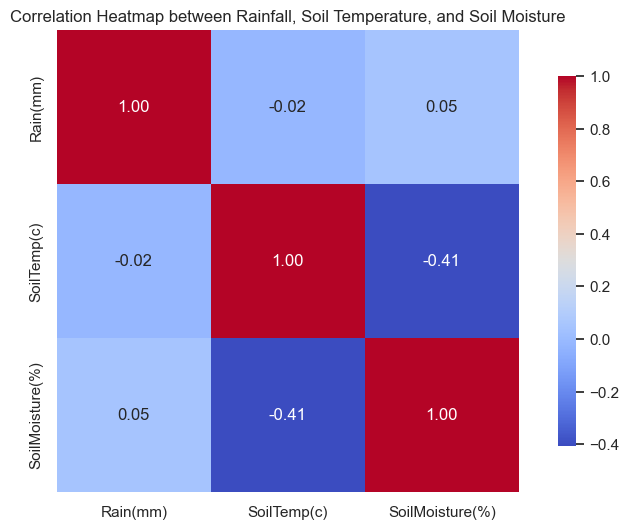

In [ ]:
correlation_data = combined_df[['Rain(mm)', 'SoilTemp(c)', 'SoilMoisture(%)']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title and labels
plt.title('Correlation Heatmap between Rainfall, Soil Temperature, and Soil Moisture')
plt.show()

In [ ]:
combined_df.set_index('Timestamp (UTC+12:00)', inplace=True)

soil_df = combined_df.resample('D').agg({
    'Rain(mm)': 'sum',
    'SoilTemp(c)': 'mean',
    'SoilMoisture(%)': 'mean'
})

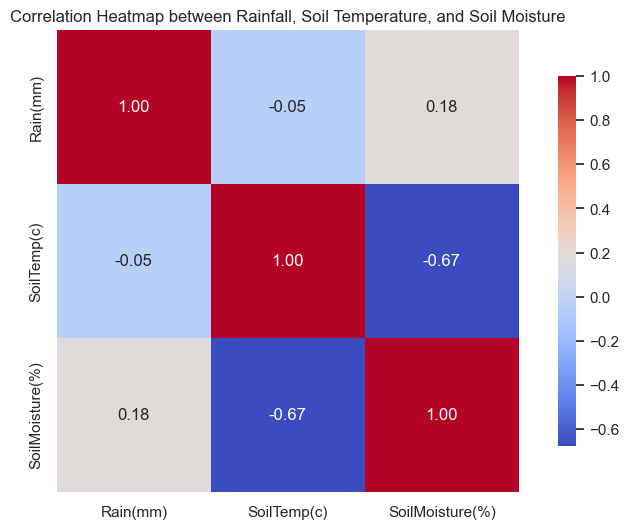

In [ ]:
correlation_data = soil_df[['Rain(mm)', 'SoilTemp(c)', 'SoilMoisture(%)']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title and labels
plt.title('Correlation Heatmap between Rainfall, Soil Temperature, and Soil Moisture')
plt.show()

In [ ]:
lag_days = [1, 7, 14, 30, 45, 60]
# Create lag features
for lag in lag_days:

    soil_df[f'SoilMoist_lag_{lag}'] = soil_df['SoilMoisture(%)'].shift(lag)
    soil_df[f'Rainfall_lag_{lag}'] = soil_df['Rain(mm)'].shift(lag)
    soil_df[f'Temperature_lag_{lag}'] = soil_df['SoilTemp(c)'].shift(lag)

# Drop rows with NaN values created by shifting
soil_df = soil_df.dropna()
soil_df

,Rain(mm),SoilTemp(c),SoilMoisture(%),SoilMoist_lag_1,Rainfall_lag_1,Temperature_lag_1,SoilMoist_lag_7,Rainfall_lag_7,Temperature_lag_7,SoilMoist_lag_14,...,Temperature_lag_14,SoilMoist_lag_30,Rainfall_lag_30,Temperature_lag_30,SoilMoist_lag_45,Rainfall_lag_45,Temperature_lag_45,SoilMoist_lag_60,Rainfall_lag_60,Temperature_lag_60
Timestamp (UTC+12:00),,,,,,,,,,,,,,,,,,,,,
2014-07-26,3.52,11.160938,45.070831,45.142151,23.27,10.785156,44.683456,34.51,9.213281,46.141747,...,13.767969,47.017861,16.95,15.206944,50.511531,61.95,14.488542,43.587800,0.00,13.400000
2014-07-27,4.66,11.500260,44.922081,45.070831,3.52,11.160938,45.336930,17.20,10.875781,45.211648,...,13.251823,46.958990,52.86,14.504861,46.786743,2.15,14.722222,43.843618,0.00,12.165854
2014-07-28,1.01,10.409635,44.955344,44.922081,4.66,11.500260,45.353922,37.25,11.101042,44.909901,...,12.604948,46.965153,18.08,13.598958,46.158962,0.00,14.149653,44.162788,1.01,12.324176
2014-07-29,0.00,10.439063,44.835792,44.955344,1.01,10.409635,45.219313,6.19,10.286198,44.742312,...,11.762240,46.465299,0.00,13.108681,46.049583,0.00,12.830556,44.706424,16.39,14.523958
2014-07-30,18.35,12.459115,44.939841,44.835792,0.00,10.439063,44.967380,1.00,9.776823,44.673029,...,10.714844,46.955521,47.58,13.476736,45.939514,0.00,12.260069,44.472358,0.00,14.254167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-17,0.00,15.402083,47.691271,47.931375,0.00,15.367708,49.624802,3.50,16.010417,50.746292,...,16.055208,50.854740,5.50,13.613542,47.564748,2.00,15.015972,48.567321,66.92,14.114757
2024-10-18,0.00,15.523958,47.512344,47.691271,0.00,15.402083,49.150771,0.00,15.943750,50.609135,...,15.554167,51.131115,2.00,12.942708,47.312675,17.98,15.418229,48.458717,41.96,13.266840
2024-10-19,0.00,15.954167,47.345167,47.512344,0.00,15.523958,48.671677,0.00,15.645833,49.484365,...,15.448958,51.037708,4.00,13.273958,47.297443,5.00,14.650174,48.554130,10.48,12.519271


In [ ]:
soil_df.head()

,Rain(mm),SoilTemp(c),SoilMoisture(%)
Timestamp (UTC+12:00),,,
2014-05-27,0.00,13.400000,43.587800
2014-05-28,0.00,12.165854,43.843618
2014-05-29,1.01,12.324176,44.162788
2014-05-30,16.39,14.523958,44.706424
2014-05-31,0.00,14.254167,44.472358


In [ ]:
combined_df['Timestamp (UTC+12:00)'] = pd.to_datetime(combined_df['Timestamp (UTC+12:00)'])

# Extract relevant time features
combined_df['Hour'] = combined_df['Timestamp (UTC+12:00)'].dt.hour
combined_df['Day'] = combined_df['Timestamp (UTC+12:00)'].dt.day
combined_df['Month'] = combined_df['Timestamp (UTC+12:00)'].dt.month
combined_df['Year'] = combined_df['Timestamp (UTC+12:00)'].dt.year

# Select relevant columns including ecological info (replace 'Eco1', 'Eco2', etc. with actual column names)
eco_columns = ['BrackishEstuarine', 'CoastalForest', 'DuneVegetation', 'FreshwaterWetland', 
               'KauriForest', 'SoilTemp(c)', 'SoilMoisture(%)', 'Rain(mm)', 'Hour', 'Day', 'Month', 'Year']
corr_columns = combined_df[eco_columns]

# Compute the correlation matrix
corr = corr_columns.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Add titles and labels
plt.title('Correlation Heatmap Including Ecological Info and Time Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

KeyError: 'Timestamp (UTC+12:00)'

Create Lag Features

In [ ]:
df = pd.DataFrame()

for station_file in station_files:
    station_data = pd.read_csv(station_file)  
    df = pd.concat([df, station_data], ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: 'mtalbert'

In [ ]:
lag_days = [1, 7, 14, 30, 45]
# Create lag features
for lag in lag_days:

    df[f'SoilMoist_lag_{lag}'] = df['SoilMoisture(%)'].shift(lag)
    df[f'Rainfall_lag_{lag}'] = df['Rain(mm)'].shift(lag)
    df[f'Temperature_lag_{lag}'] = df['SoilTemp(c)'].shift(lag)

# Drop rows with NaN values created by shifting
df = df.dropna()

In [ ]:
X = df.drop(columns=['SoilMoisture(%)'])  # Features
y = df['SoilMoisture(%)']  # Target